In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Анализ данных одной метрики одной БД 

In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath('../src/'))
print(os.listdir("../input"))

['sample_redosize1.csv', 'metrics.csv', 'database_original.csv', 'sample_dbtime2.csv', 'sample_dbsize1.csv', 'sample_dbsize2.csv', 'sample_dbtime1.csv', 'database_data.csv']


In [3]:
INPUT_DATAFRAME = '../input/database_data.csv'

In [4]:
database_data = pd.read_csv("../input/database_data.csv", decimal=',', index_col=False)
database_data = database_data.set_index('rollup_timestamp')

In [5]:
database_data

database redosize_mb dbtime  \
rollup_timestamp                                                            
2019-04-11        e859c352-1087-4602-a410-77845a1ad2f6       606.0   83.0   
2019-04-12        e859c352-1087-4602-a410-77845a1ad2f6      2328.0  649.0   
2019-04-13        e859c352-1087-4602-a410-77845a1ad2f6      1221.0   33.0   
2019-04-14        e859c352-1087-4602-a410-77845a1ad2f6       246.0  661.0   
2019-04-15        e859c352-1087-4602-a410-77845a1ad2f6      1610.0  665.0   
...                                                ...         ...    ...   
2020-03-18        fe4dd1a0-9bf2-40d6-8950-d52c9af1c0f7       175.0  673.0   
2020-03-19        fe4dd1a0-9bf2-40d6-8950-d52c9af1c0f7       698.0  276.0   
2020-03-20        fe4dd1a0-9bf2-40d6-8950-d52c9af1c0f7       576.0  941.0   
2020-03-21        fe4dd1a0-9bf2-40d6-8950-d52c9af1c0f7       582.0  755.0   
2020-03-22        fe4dd1a0-9bf2-40d6-8950-d52c9af1c0f7       579.0   32.0   

                 size_gd  
rollup_timestamp          
2019-04-11         396.0  
2019-04-12         824.0  
2019-04-13         232.0  
2019-04-14         107.0  
2019-04-15         504.0  
...                  ...  
2020-03-18          41.0  
2020-03-19          42.0  
2020-03-20          41.0  
2020-03-21          42.0  
2020-03-22          41.0  

[293572 rows x 4 columns]

In [6]:
database_data['database'].unique()

array(['e859c352-1087-4602-a410-77845a1ad2f6',
       '62eb874a-5ad9-4e9f-ad01-7e58a97f0481',
       'd383ee5c-e693-42fd-b1bd-1fdf863de560',
       '8581ea9c-9870-47fa-b92b-40466fe6c657',
       '2d584440-663c-410d-804b-8d03ffe54806',
       '744cbaee-7a4c-4af0-a26d-bc8dd5e7f09d',
       '289947fa-f70e-42ab-9017-075876e4e8c9',
       '379625ff-2ef5-4a6c-8d68-ababaeb09670',
       'd0ec832e-af59-4e48-a61b-951a7d696d43',
       '2b4a67a5-28df-40f7-986a-7c8e609a0009',
       'e21ed895-22fd-45f8-bd96-46f4b28ca2f8',
       '196acd29-784f-4eb3-a526-292c9f5b92e0',
       'f014474b-eab7-4a34-b360-19f117a466c6',
       '66899278-f899-438c-8593-4151d197b831',
       '11b94100-2f9c-4f7d-8607-5d9a73e54eb0',
       'a6f3f9f5-3182-4a6f-8afb-cb47116dfd1e',
       '768a3f19-bac2-453a-8c00-5518788b5d9f',
       '76a7378a-850c-4a80-9b1d-206f010461bf',
       'd4ff79a4-32e0-4ee4-b2e3-fa6286f0c9b3',
       '432680d4-35fc-4b33-aa04-8e6c31285843',
       'e324d283-649b-49cc-895a-2998bf0931b0',
       'cca84

In [6]:
# input_database = 'e859c352-1087-4602-a410-77845a1ad2f6'
# одно пропущенное
input_database = 'bbdf5414-339f-4ae3-9b4e-888ceb2962d4'
# много пропущенных
# input_database = '5734ae5c-3e65-4995-942d-803a42a73a75'
# нет пропущенных
input_metric = 'dbtime'

In [34]:
import pandas as pd
import numpy as np

INPUT_DATAFRAME = '../input/database_data.csv'

class InformationClass():

    def __init__(self):
        """
        This class give some brief information about the datasets.
        """
        print("Information object created")

    def _get_missing_values(self,data):
        """
        Find missing dates of given sample
        """
        #Getting sum of missing values for each feature
        missing_values = pd.date_range(start = data.index.min(), end = data.index.max() ).difference(data.index)
        
        #Returning missing values
        return missing_values

    def info(self,data):
        """
        print various info about dataset
        """
        self.missing_values=self._get_missing_values(data)

        print("=" * 50)

        print(f'Data range from {data.index.min().strftime("%d.%m.%Y")} to {data.index.max().strftime("%d.%m.%Y")}')
        print(f'Total number of samples: {len(data)}')
        if len(self.missing_values) > 0:
            print(f'Total number of of missing dates from timeseries {len(self.missing_values)}:')
            print(', '.join(self.missing_values.strftime("%d.%m.%Y").tolist()))
            print('\'backfill\' by default will be user for resample')
        print("="*50)

class PreprocessClass():

    def __init__(self):
        """
        Preprocess class for dataset
        """
        print("PreprocessClass object created")

    def preprocess(self, data, strategy_type):
        self.data = data
        self.data = self.data.resample('D').fillna(strategy_type)
        return self.data

        
class SampleClass():

    def __init__(self, input_database, input_metric):
        """

        :param sample: data will be used for modelling and evaluation
        """
        data = pd.read_csv(INPUT_DATAFRAME)
        data['rollup_timestamp'] = pd.to_datetime(data['rollup_timestamp'])
        data = data.set_index('rollup_timestamp')

        self.sample = data[data['database'] == input_database][[input_metric]]
        self.sample.rename(columns={input_metric: "value"}, inplace=True)
        self.sample.index = pd.to_datetime(self.sample.index)

        print("SampleClass object created")

        self.number_of_data=self.sample.shape[0]
        
        #Create instance of objects
        self._info = InformationClass()
        self._preprocess = PreprocessClass()

    def _get_all_data(self):
        return pd.concat([self.sample])

    def information(self):
        """
        using _info object gives summary about dataset
        :return:
        """
        self._info.info(self.sample)

    def preprocess(self, strategy_type="backfill"):
        """
        Process data depend upon strategy type
        :param strategy_type: Preprocessing strategy type
        :return:
        """
        self.strategy_type=strategy_type
        
        self.sample = self._preprocess.preprocess(self.sample, strategy_type)

In [162]:
import trends

In [41]:
# sample = trends.ObjectOrientedSample(input_database, input_metric)
sample = SampleClass(input_database, input_metric)

SampleClass object created
Information object created
PreprocessClass object created


In [46]:
sample.information()

Data range from 01.06.2018 to 21.12.2019
Total number of samples: 569


In [44]:
sample.preprocess()

In [45]:
sample._get_all_data()

value
rollup_timestamp       
2018-06-01        941.0
2018-06-02        847.0
2018-06-03         76.0
2018-06-04        217.0
2018-06-05        821.0
...                 ...
2019-12-17          NaN
2019-12-18          NaN
2019-12-19          NaN
2019-12-20          NaN
2019-12-21          NaN

[569 rows x 1 columns]

In [10]:
sample = pd.read_csv('../input/sample_dbtime2.csv')
sample['rollup_timestamp'] = pd.to_datetime(sample['rollup_timestamp'])
sample = sample.set_index('rollup_timestamp')

In [15]:
database_data = pd.read_csv('../input/database_data.csv')
database_data = database_data.set_index('rollup_timestamp')

In [173]:
sample = databasedata[tablespace_data['database'] == input_database][[input_metric]]
sample.rename(columns={input_metric: "value"}, inplace=True)
sample.index = pd.to_datetime(sample.index)

In [24]:
sample.shape

(509, 2)

In [190]:
pd.date_range(start = sample.index.min(), end = sample.index.max() ).difference(sample.index)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [189]:
print(sample.index.freq)

<Day>


In [188]:
sample = sample.resample('D').fillna("backfill")

In [176]:
sample['value'].interpolate(method='linear', inplace=True)

In [149]:
sample_s = sample['value']

In [150]:
sample_v = sample[['value']]

## Графики

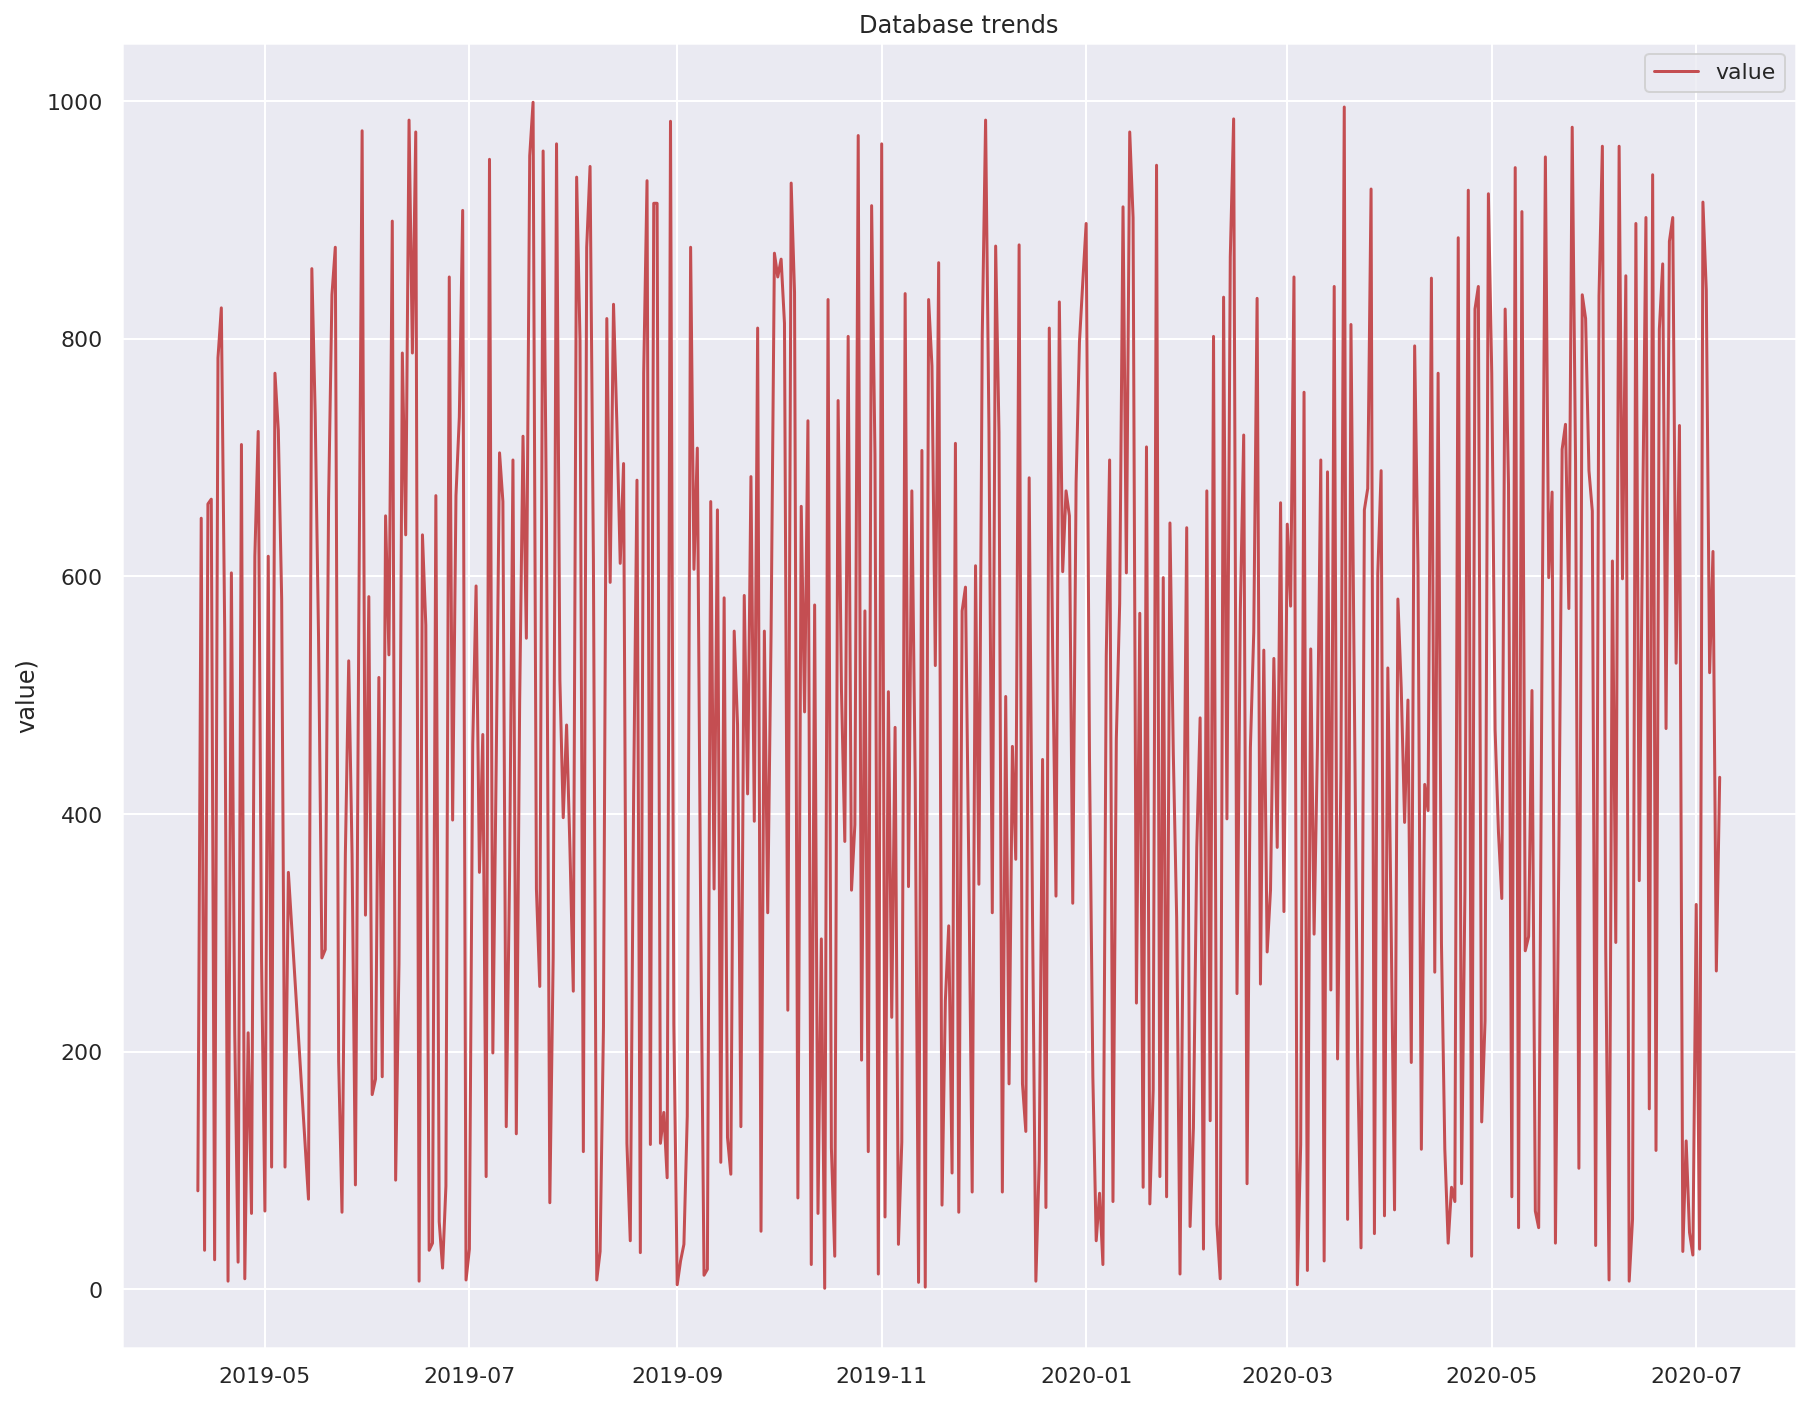

In [191]:
plt.figure(figsize=(15, 12))
plt.plot(sample.index, sample['value'], 'r-', label = 'value')
plt.title('Database trends')
plt.ylabel('value)');
plt.legend();
plt.show()

### Усреднение за месяц

In [152]:
sample_month = sample['value'].resample('MS').mean()

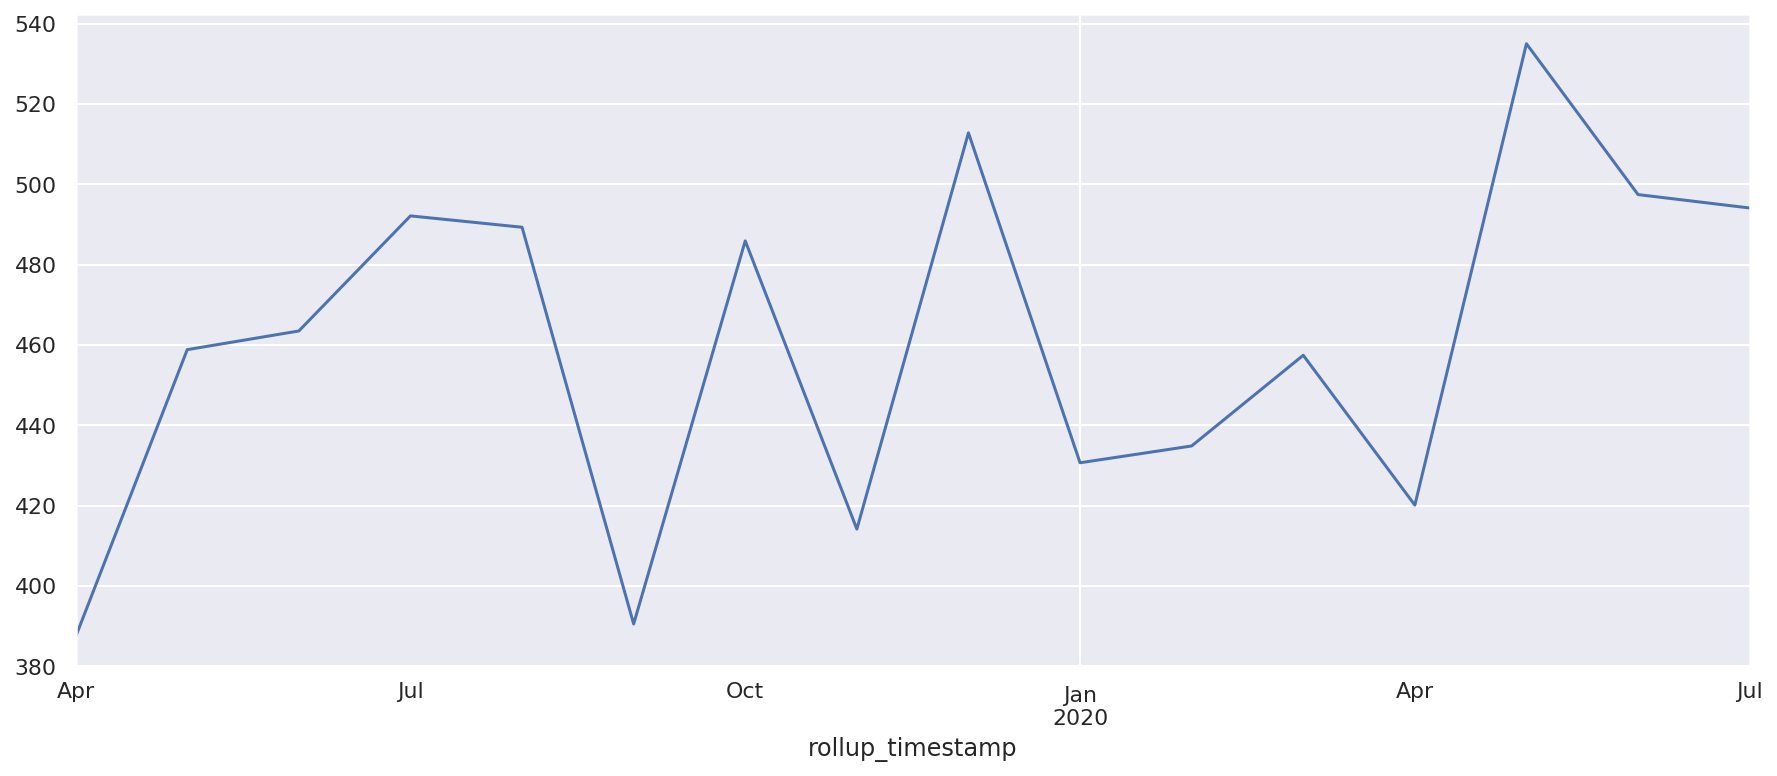

In [153]:
sample_month.plot(figsize=(15, 6))
plt.show()

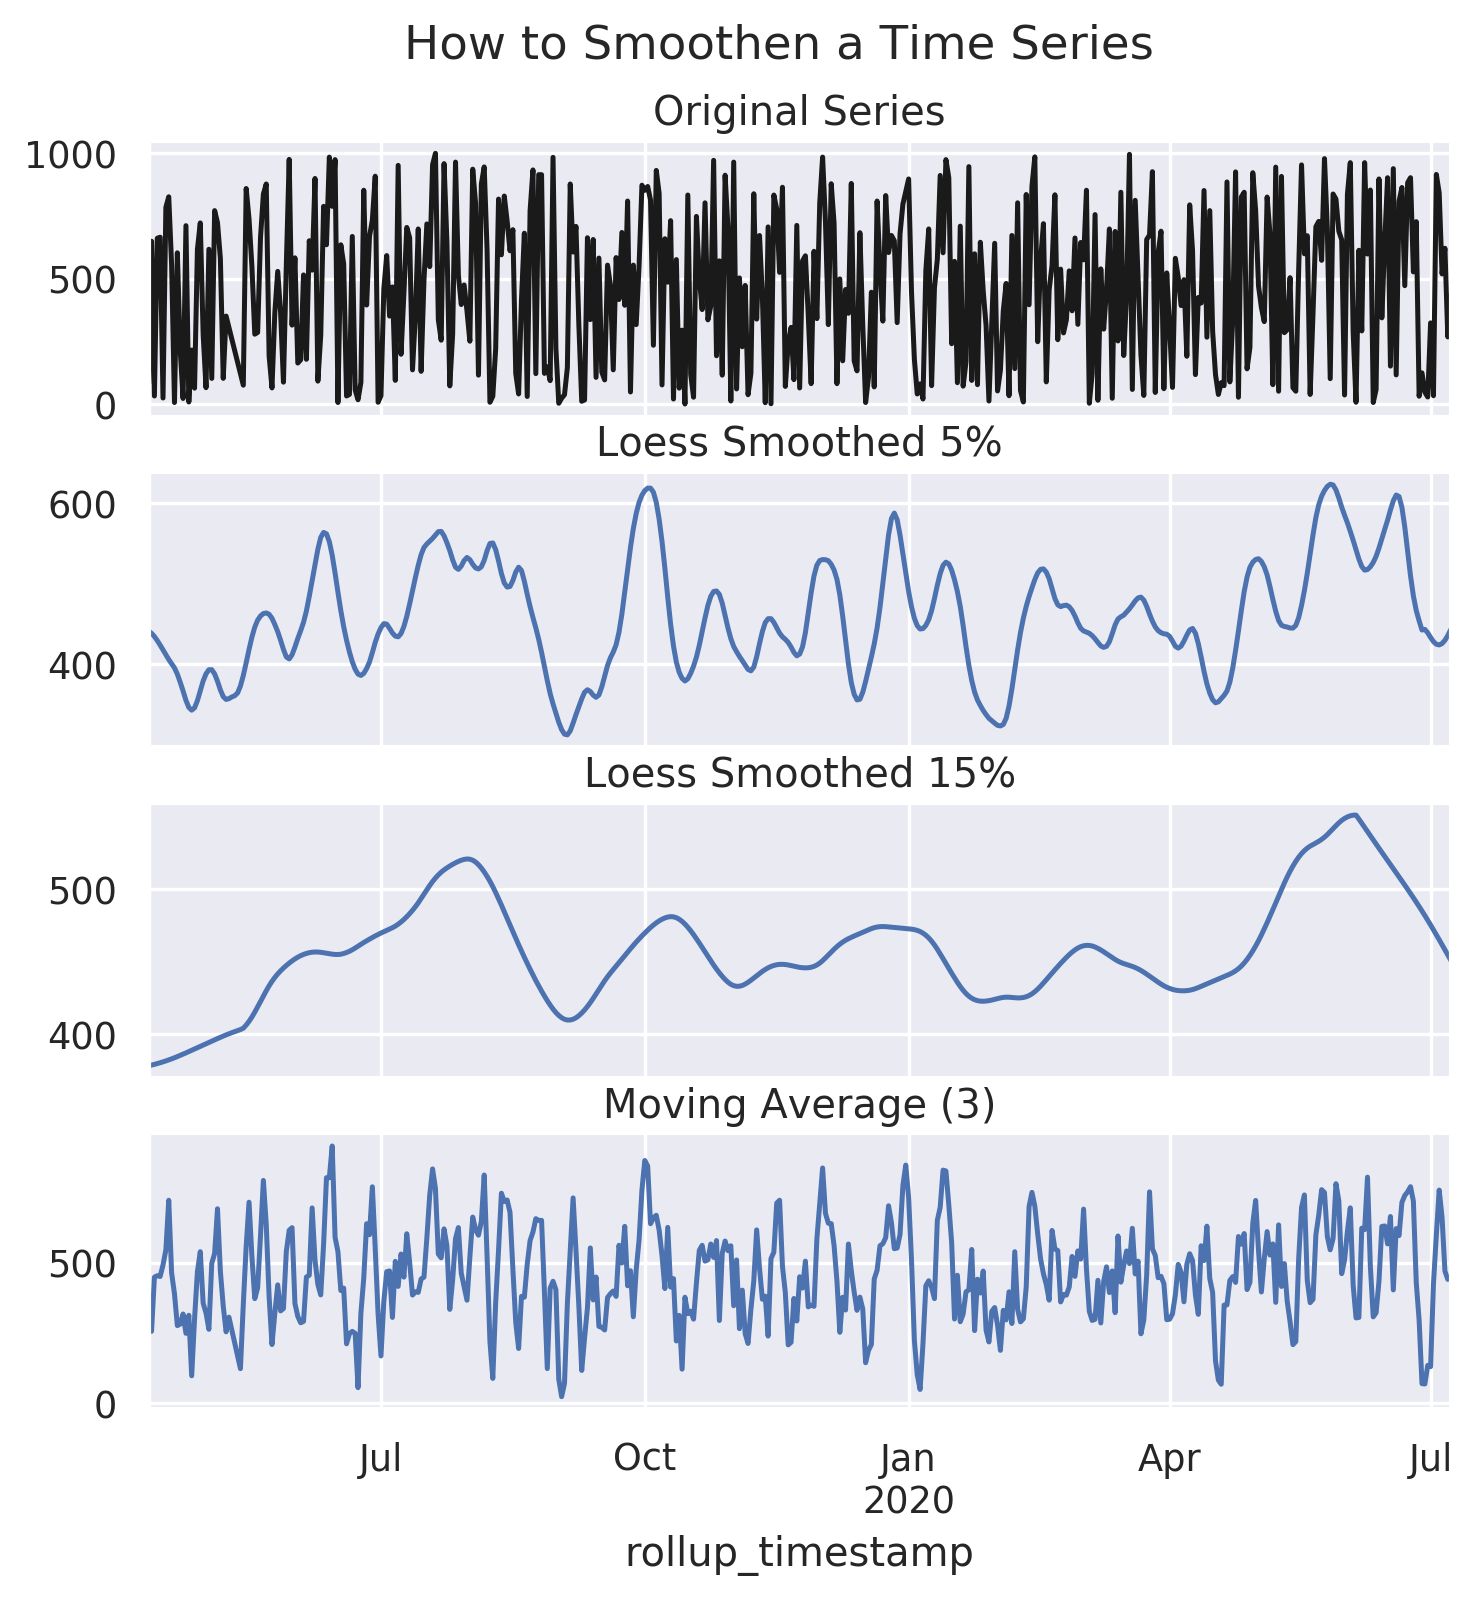

In [192]:
# сглаживания для наглядной визуализации
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# бегущее среднее
sample_ma = sample.value.rolling(3, center=True, closed='both').mean()

# локальная регрессия (5% и 15%)
sample_loess_5 = pd.DataFrame(lowess(sample.value, np.arange(len(sample.value)), frac=0.05)[:, 1], index=sample.index, columns=['value'])
sample_loess_15 = pd.DataFrame(lowess(sample.value, np.arange(len(sample.value)), frac=0.15)[:, 1], index=sample.index, columns=['value'])

fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
sample['value'].plot(ax=axes[0], color='k', title='Original Series')
sample_loess_5['value'].plot(ax=axes[1], title='Loess Smoothed 5%')
sample_loess_15['value'].plot(ax=axes[2], title='Loess Smoothed 15%')
sample_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()

Text(0.5, 1.0, 'detrended by subtracting the least squares fit')

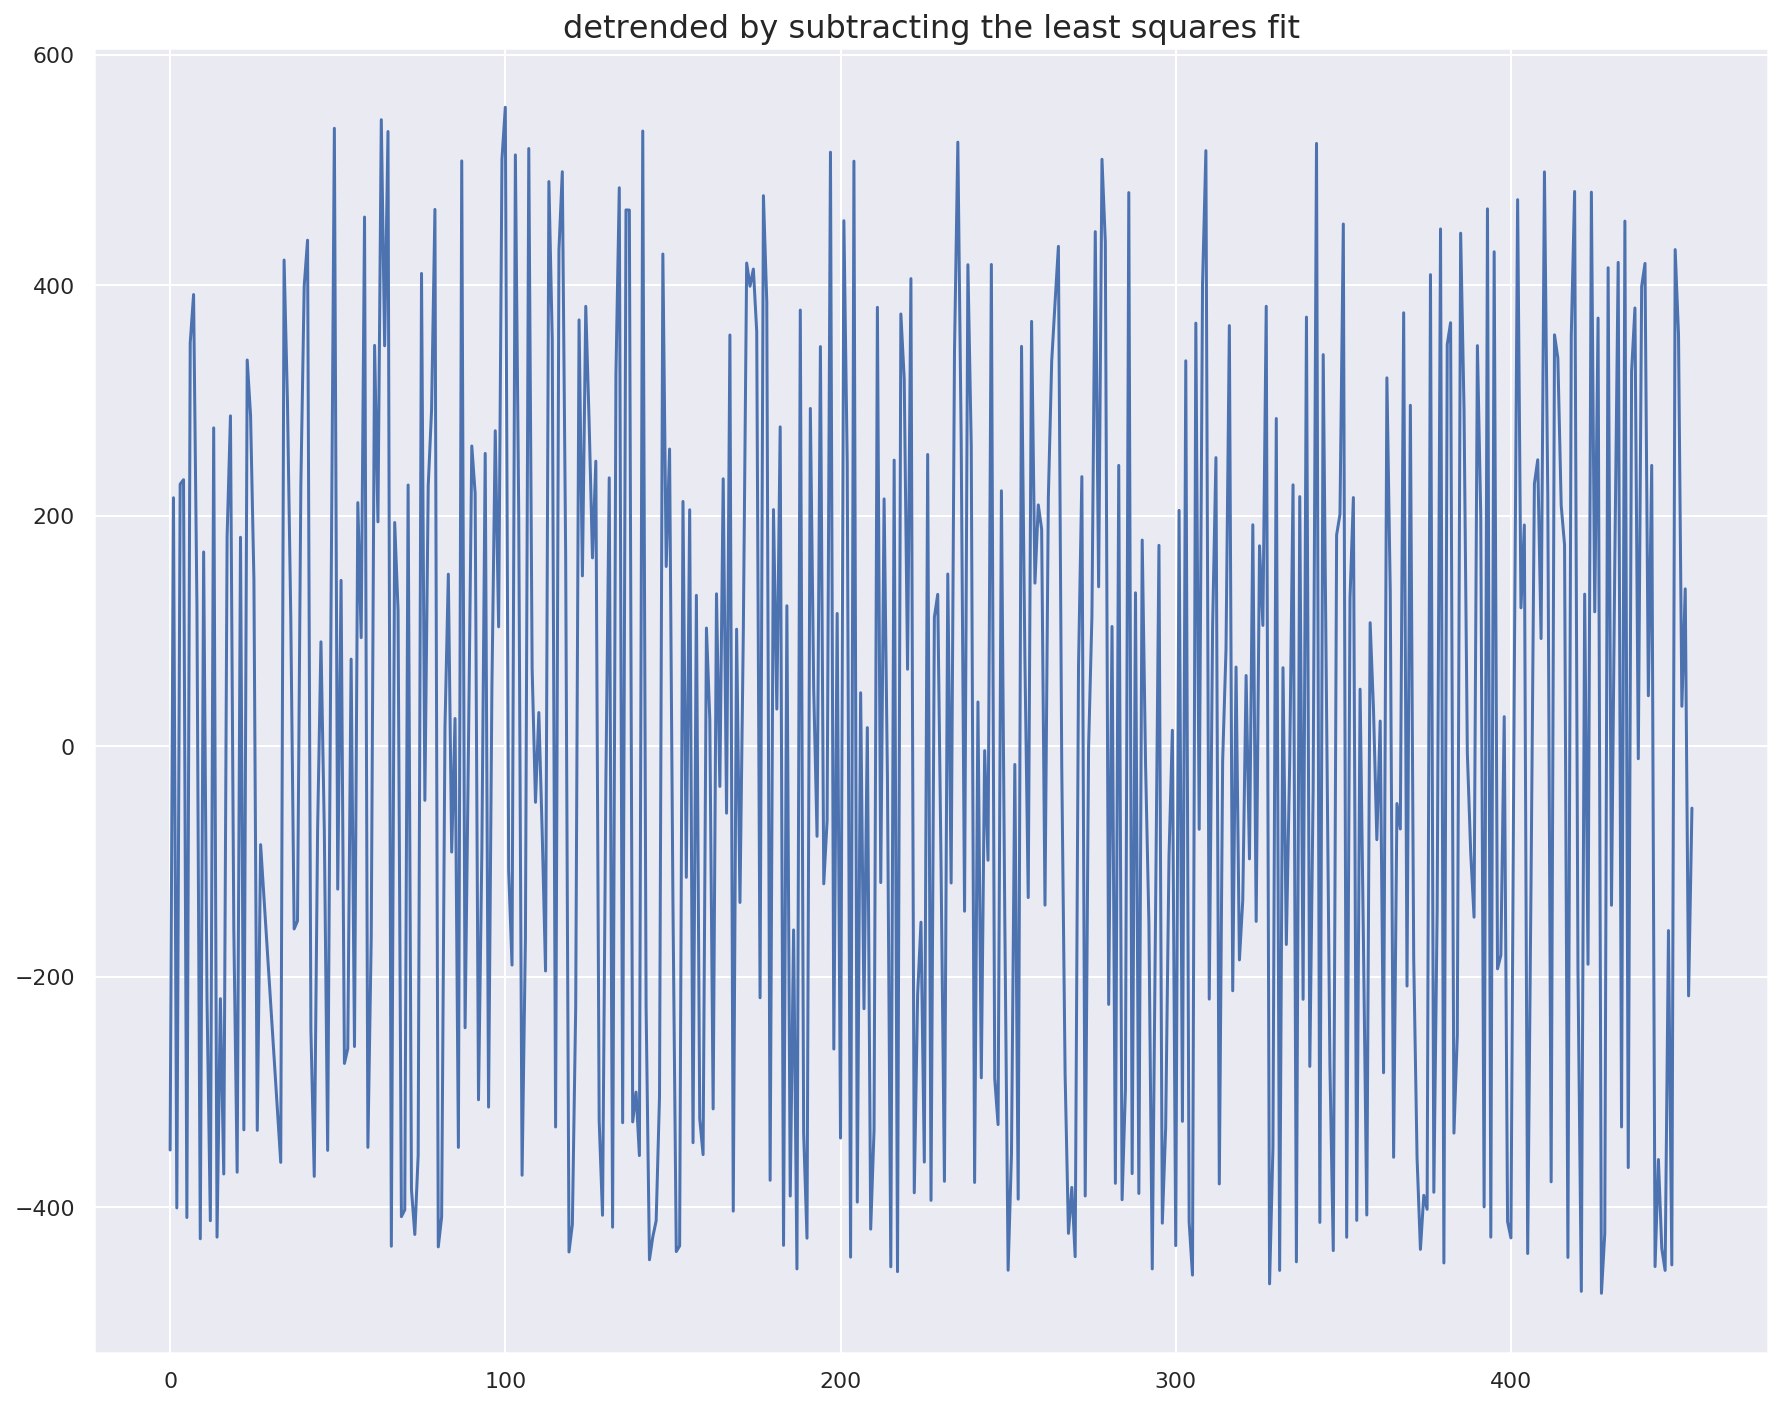

In [193]:
# с помощью scipy убираем компонент тренда, чтобы показать колебания
from scipy import signal
detrended = signal.detrend(sample.value.values)
plt.figure(figsize=(15, 12))
plt.plot(detrended)
plt.title('detrended by subtracting the least squares fit', fontsize=16)

In [194]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

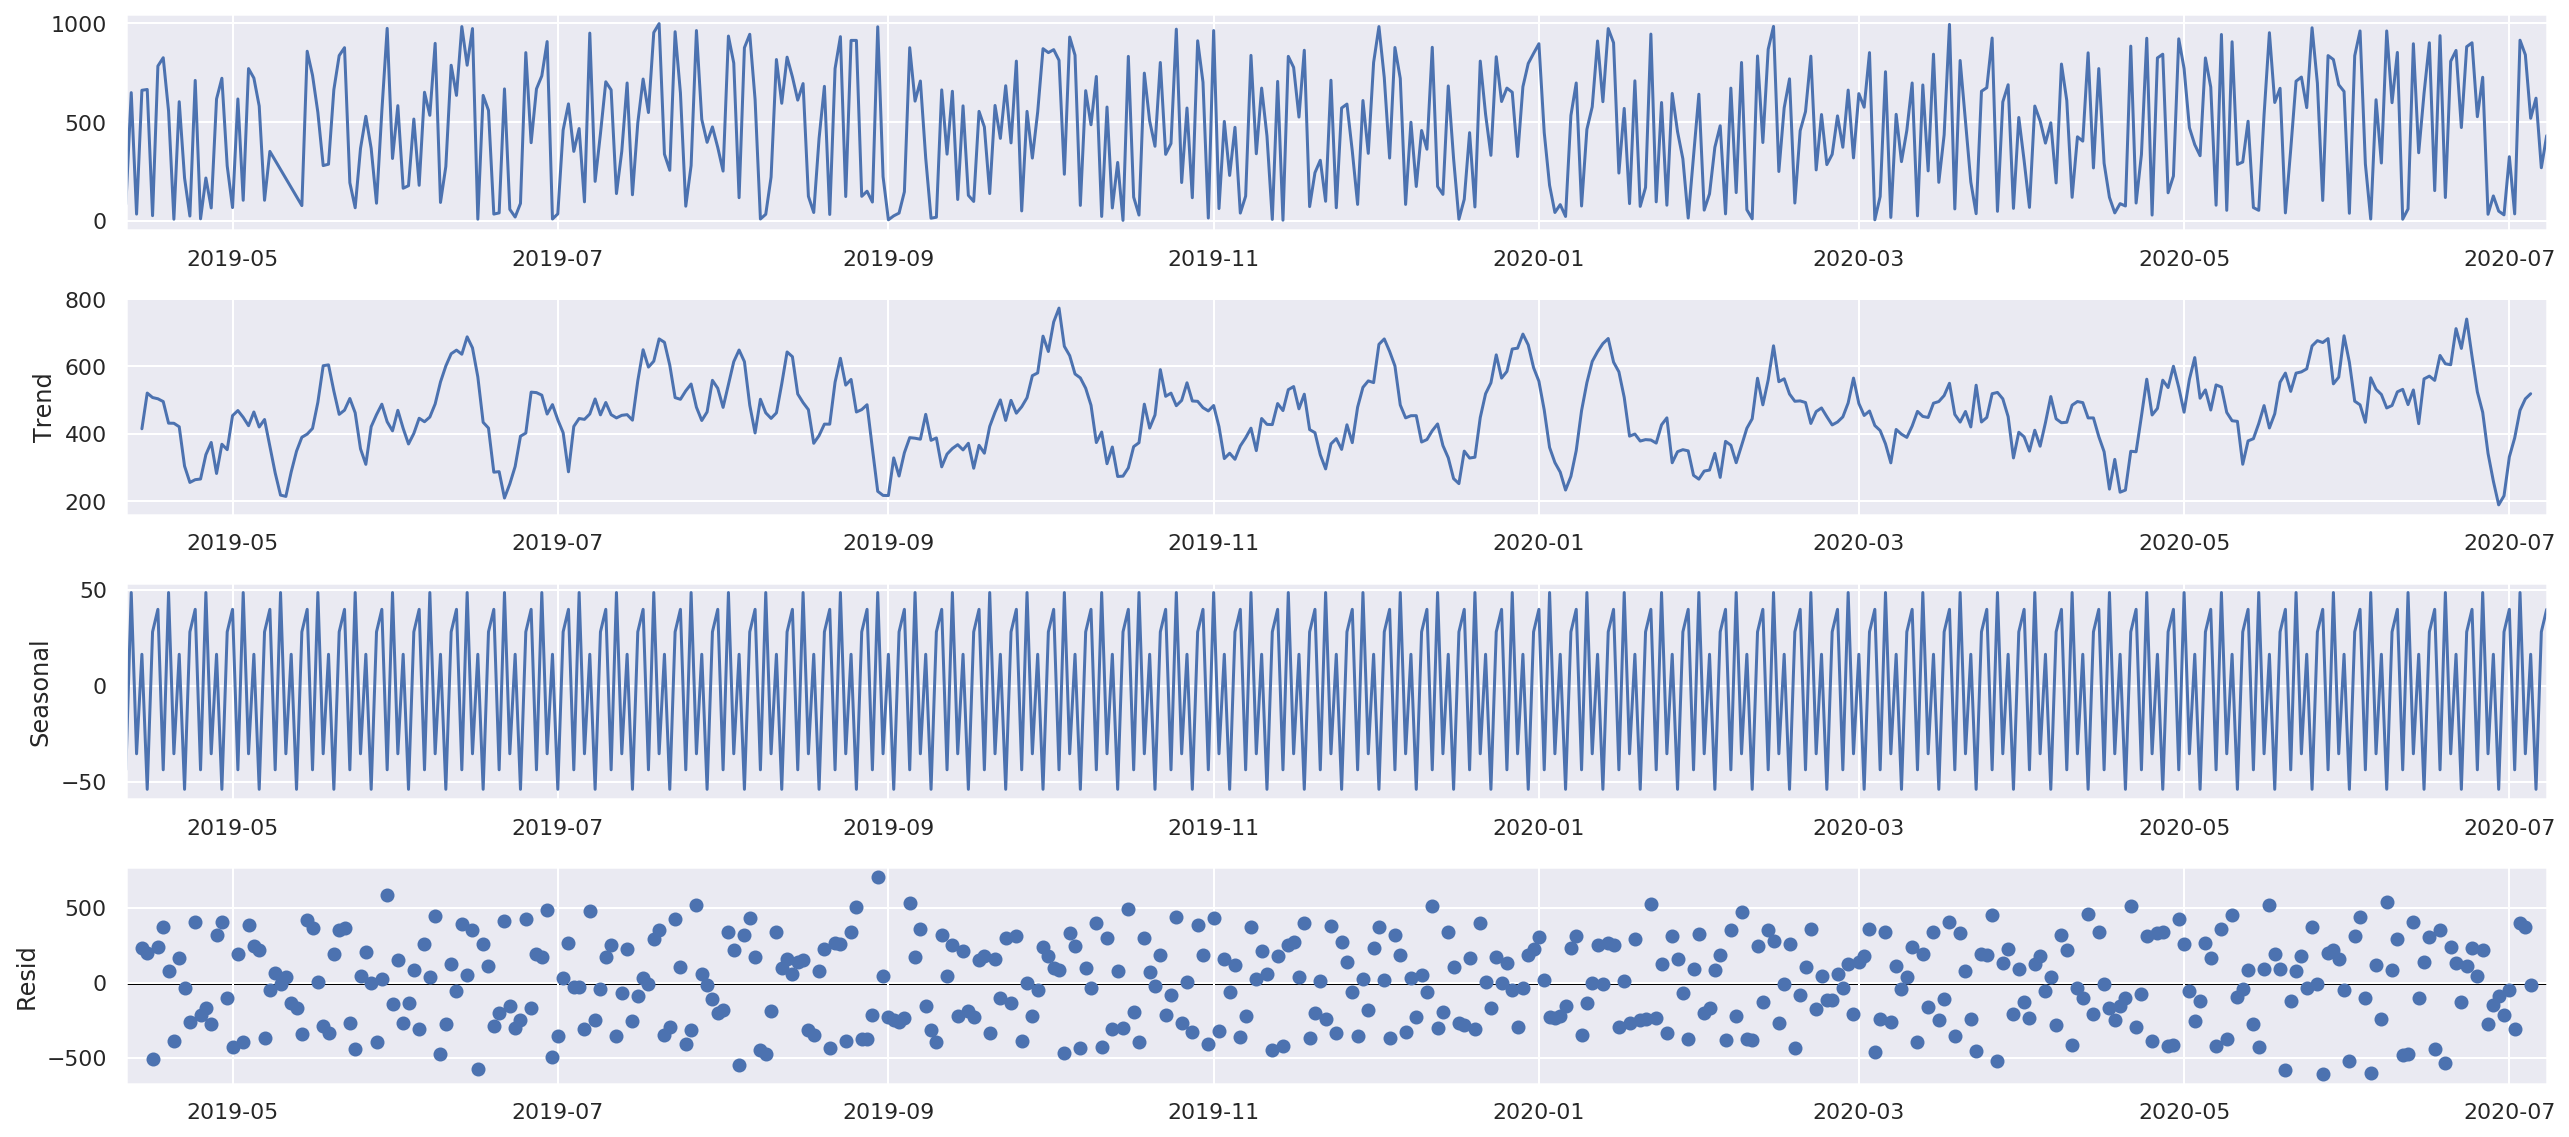

In [196]:
# извлечение тренда, сезонности и шума
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(sample, model='additive')
fig = decomposition.plot()
plt.show()

## Открытый курс машинного обучения. Тема 9. Анализ временных рядов с помощью Python
https://habr.com/ru/company/ods/blog/327242/

In [14]:
import sys
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from scipy.optimize import minimize

import matplotlib.pyplot as plt


In [123]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
init_notebook_mode(connected = True)

def plotly_df(df, title = ''):
    data = []

    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)

    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

plotly_df(sample_v, title = "Online users")

In [124]:
def plotMovingAverage(series, n):

    """
    series - dataframe with timeseries
    n - rolling window size 

    """

    rolling_mean = series.rolling(window=n).mean()

    # При желании, можно строить и доверительные интервалы для сглаженных значений
    #rolling_std =  series.rolling(window=n).std()
    #upper_bond = rolling_mean+1.96*rolling_std
    #lower_bond = rolling_mean-1.96*rolling_std

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(n))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    #plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
    #plt.plot(lower_bond, "r--")
    plt.plot(sample_v[n:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

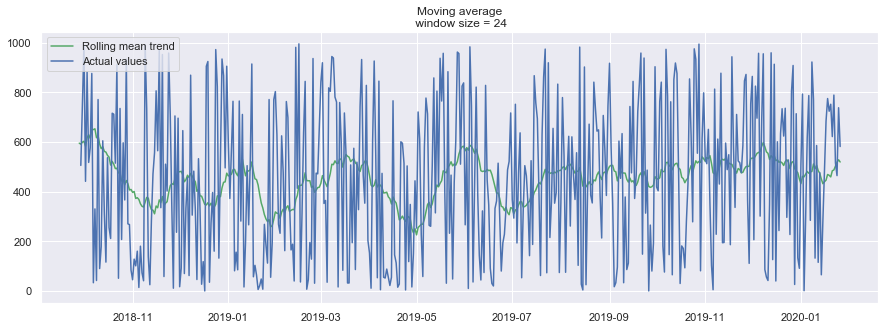

In [125]:
plotMovingAverage(sample_v, 24) # сглаживаем по дням

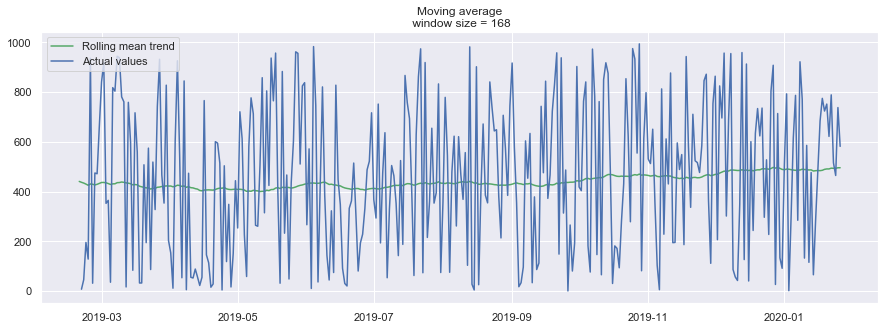

In [126]:
plotMovingAverage(sample_v, 24*7) # сглаживаем по неделям

In [127]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

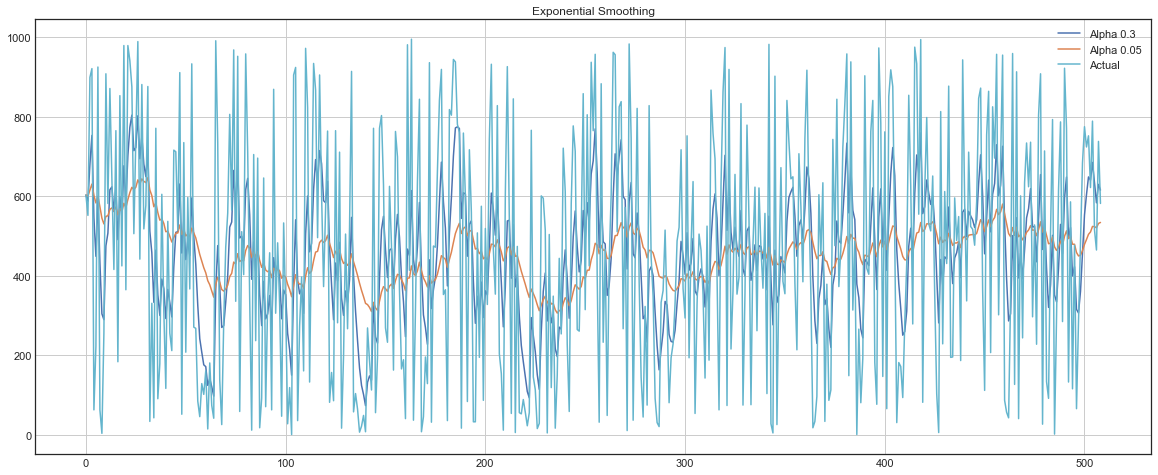

In [128]:
with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(20, 8))
    for alpha in [0.3, 0.05]:
        plt.plot(exponential_smoothing(sample_v.value, alpha), label="Alpha {}".format(alpha))
    plt.plot(sample_v.value.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True)

In [129]:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # прогнозируем
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

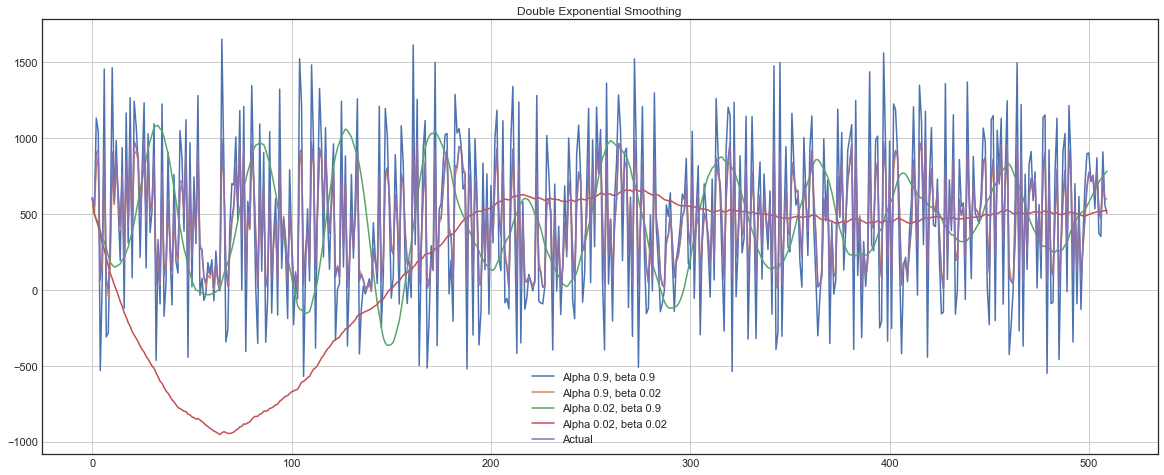

In [130]:
with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(20, 8))
    for alpha in [0.9, 0.02]:
        for beta in [0.9, 0.02]:
            plt.plot(double_exponential_smoothing(sample_v.value, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(sample_v.value.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

### кросс-валидации на временном ряду

In [131]:
from sklearn.model_selection import TimeSeriesSplit

def timeseriesCVscore(x):
    # вектор ошибок
    errors = []

    values = data.values
    alpha, beta, gamma = x

    # задаём число фолдов для кросс-валидации
    tscv = TimeSeriesSplit(n_splits=3) 

    # идем по фолдам, на каждом обучаем модель, строим прогноз на отложенной выборке и считаем ошибку
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen = 24*7, alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()

        predictions = model.result[-len(test):]
        actual = values[test]
        error = mean_squared_error(predictions, actual)
        errors.append(error)

    # Возвращаем средний квадрат ошибки по вектору ошибок 
    return np.mean(np.array(errors))

In [132]:
%%time
data = sample_v.value[:-200] # отложим часть данных для тестирования

# инициализируем значения параметров
x = [0, 0, 0] 

# Минимизируем функцию потерь с ограничениями на параметры
opt = minimize(timeseriesCVscore, x0=x, method="TNC", bounds = ((0, 1), (0, 1), (0, 1)))

# Из оптимизатора берем оптимальное значение параметров
alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)

ZeroDivisionError: float division by zero

## Линейные и не очень модели на временных рядах

In [133]:
def code_mean(data, cat_feature, real_feature):
    """
    Возвращает словарь, где ключами являются уникальные категории признака cat_feature, 
    а значениями - средние по real_feature
    """
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [135]:
data = sample_v
data.columns = ["y"]

data["hour"] = data.index.hour
data["weekday"] = data.index.weekday
data['is_weekend'] = data.weekday.isin([5,6])*1
data.head()

y  hour  weekday  is_weekend
rollup_timestamp                                  
2018-09-05        603.0     0        2           0
2018-09-06        552.0     0        3           0
2018-09-07        899.0     0        4           0
2018-09-08        921.0     0        5           1
2018-09-09         63.0     0        6           1

In [136]:
code_mean(data, 'weekday', "y")

{0: 448.34722222222223,
 1: 440.125,
 2: 429.43835616438355,
 3: 454.6027397260274,
 4: 471.7260273972603,
 5: 496.5342465753425,
 6: 453.73972602739724}

In [142]:
data

y  hour  weekday  is_weekend
rollup_timestamp                                  
2018-09-05        603.0     0        2           0
2018-09-06        552.0     0        3           0
2018-09-07        899.0     0        4           0
2018-09-08        921.0     0        5           1
2018-09-09         63.0     0        6           1
...                 ...   ...      ...         ...
2020-01-22        789.0     0        2           0
2020-01-23        516.0     0        3           0
2020-01-24        465.0     0        4           0
2020-01-25        738.0     0        5           1
2020-01-26        582.0     0        6           1

[509 rows x 4 columns]

In [137]:
def prepareData(data, lag_start=5, lag_end=20, test_size=0.15):

    data = pd.DataFrame(data.copy())
    data.columns = ["y"]

    # считаем индекс в датафрейме, после которого начинается тестовыый отрезок
    test_index = int(len(data)*(1-test_size))

    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.y.shift(i)

    data.index = data.index.to_datetime()
    data["hour"] = data.index.hour
    data["weekday"] = data.index.weekday
    data['is_weekend'] = data.weekday.isin([5,6])*1

    # считаем средние только по тренировочной части, чтобы избежать лика
    data['weekday_average'] = map(code_mean(data[:test_index], 'weekday', "y").get, data.weekday)
    data["hour_average"] = map(code_mean(data[:test_index], 'hour', "y").get, data.hour)

    # выкидываем закодированные средними признаки 
    data.drop(["hour", "weekday"], axis=1, inplace=True)

    data = data.dropna()
    data = data.reset_index(drop=True)

    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.loc[:test_index].drop(["y"], axis=1)
    y_train = data.loc[:test_index]["y"]
    X_test = data.loc[test_index:].drop(["y"], axis=1)
    y_test = data.loc[test_index:]["y"]

    return X_train, X_test, y_train, y_test

In [143]:
prepareData(sample_v, lag_start=5, lag_end=20, test_size=0.15)

ValueError: Length mismatch: Expected axis has 4 elements, new values have 1 elements

In [138]:
def performTimeSeriesCV(X_train, y_train, number_folds, model, metrics):
    print('Size train set: {}'.format(X_train.shape))

    k = int(np.floor(float(X_train.shape[0]) / number_folds))
    print('Size of each fold: {}'.format(k))

    errors = np.zeros(number_folds-1)

    # loop from the first 2 folds to the total number of folds    
    for i in range(2, number_folds + 1):
        print('')
        split = float(i-1)/i
        print('Splitting the first ' + str(i) + ' chunks at ' + str(i-1) + '/' + str(i) )

        X = X_train[:(k*i)]
        y = y_train[:(k*i)]
        print('Size of train + test: {}'.format(X.shape)) # the size of the dataframe is going to be k*i

        index = int(np.floor(X.shape[0] * split))

        # folds used to train the model        
        X_trainFolds = X[:index]        
        y_trainFolds = y[:index]

        # fold used to test the model
        X_testFold = X[(index + 1):]
        y_testFold = y[(index + 1):]

        model.fit(X_trainFolds, y_trainFolds)
        errors[i-2] = metrics(model.predict(X_testFold), y_testFold)

    # the function returns the mean of the errors on the n-1 folds    
    return errors.mean()

In [139]:
%%time
performTimeSeriesCV(X_train, y_train, 5, lr, mean_absolute_error)

NameError: name 'X_train' is not defined

## Prophet

In [197]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# sharper plots
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [198]:
from plotly.offline import init_notebook_mode, iplot
from plotly import graph_objs as go

# Initialize plotly
init_notebook_mode(connected=True)

In [199]:
def plotly_df(df, title=''):
    """Visualize all the dataframe columns as line plots."""
    common_kw = dict(x=df.index, mode='lines')
    data = [go.Scatter(y=df[c], name=c, **common_kw) for c in df.columns]
    layout = dict(title=title)
    fig = dict(data=data, layout=layout)
    iplot(fig, show_link=False)

In [200]:
plotly_df(sample_v, title='Posts on Medium (daily)')

In [201]:
from fbprophet import Prophet

import logging
logging.getLogger().setLevel(logging.ERROR)


In [273]:
df = sample.reset_index()
df.columns = ['ds', 'y']
# converting timezones (issue https://github.com/facebook/prophet/issues/831)
df['ds'] = df['ds'].dt.tz_localize(None)
df.tail(n=3)

ds      y
452 2020-07-06  621.0
453 2020-07-07  268.0
454 2020-07-08  431.0

In [274]:
prediction_size = 30
train_df = df[:-prediction_size]
train_df.tail(n=3)

ds      y
422 2020-06-06  613.0
423 2020-06-07  292.0
424 2020-06-08  962.0

In [275]:
m = Prophet()
m.fit(train_df);

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [276]:
future = m.make_future_dataframe(periods=prediction_size)
future.tail(n=3)

ds
452 2020-07-06
453 2020-07-07
454 2020-07-08

In [277]:
forecast = m.predict(future)
forecast.tail(n=3)

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
452 2020-07-06  494.189205   54.593742  846.436759   494.189200   494.189211   
453 2020-07-07  494.347281  144.042469  907.740145   494.347275   494.347287   
454 2020-07-08  494.505357  142.301003  947.802404   494.505351   494.505364   

     additive_terms  additive_terms_lower  additive_terms_upper     weekly  \
452      -50.873350            -50.873350            -50.873350 -50.873350   
453       23.438342             23.438342             23.438342  23.438342   
454       40.720450             40.720450             40.720450  40.720450   

     weekly_lower  weekly_upper  multiplicative_terms  \
452    -50.873350    -50.873350                   0.0   
453     23.438342     23.438342                   0.0   
454     40.720450     40.720450                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper        yhat  
452                         0.0                         0.0  443.315855  
453                         0.0                         0.0  517.785624  
454                         0.0                         0.0  535.225808

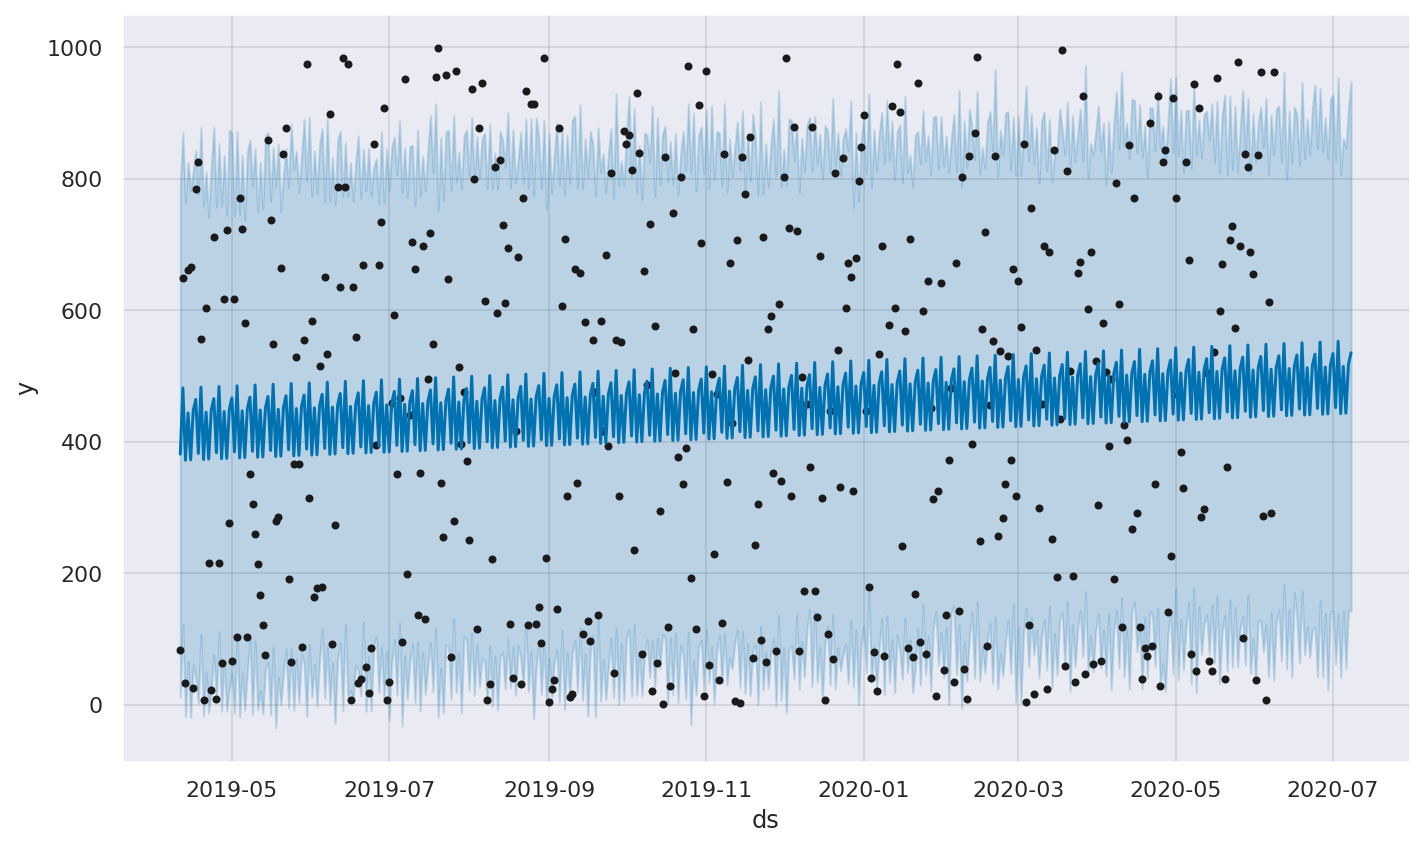

In [278]:
m.plot(forecast);

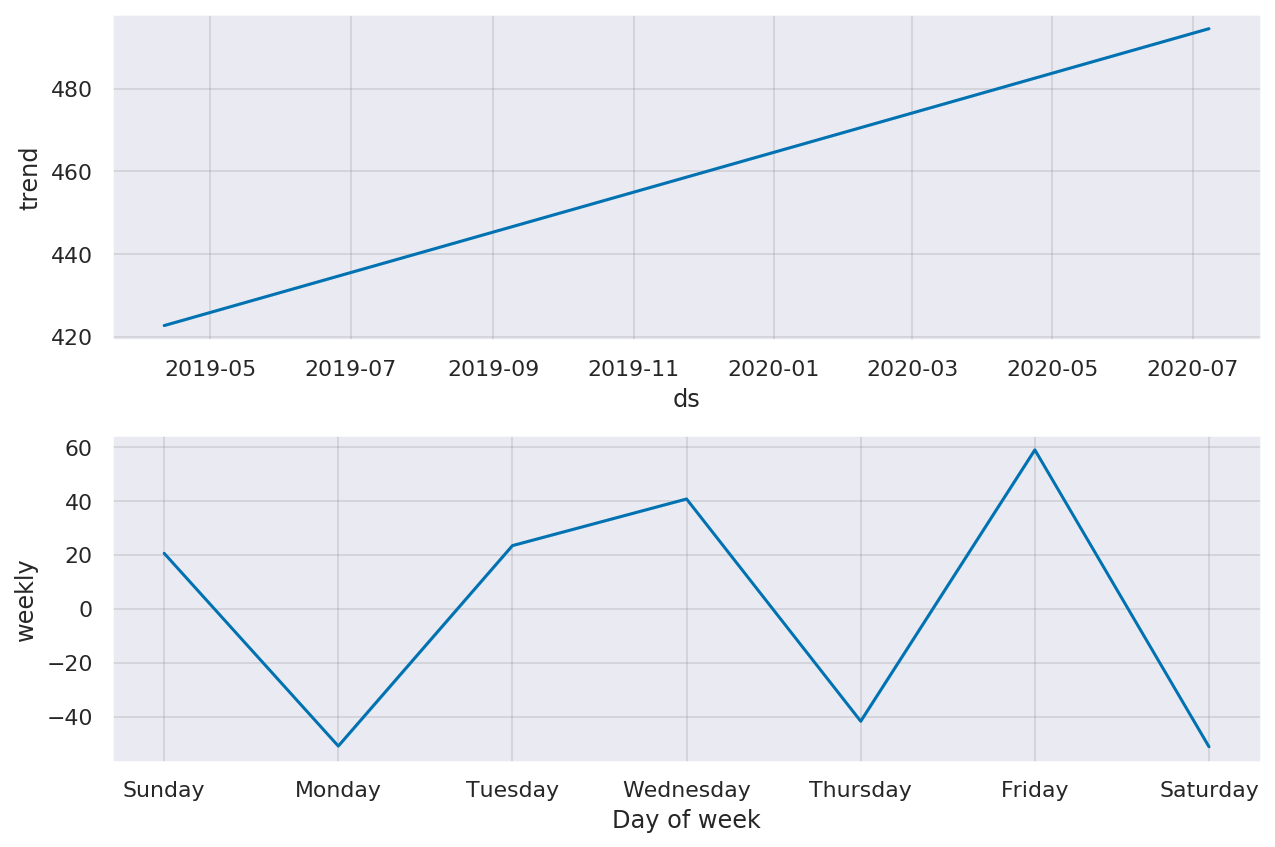

In [279]:
m.plot_components(forecast);

In [280]:
print(', '.join(forecast.columns))

ds, trend, yhat_lower, yhat_upper, trend_lower, trend_upper, additive_terms, additive_terms_lower, additive_terms_upper, weekly, weekly_lower, weekly_upper, multiplicative_terms, multiplicative_terms_lower, multiplicative_terms_upper, yhat


In [281]:
def make_comparison_dataframe(historical, forecast):
    """Join the history with the forecast.
    
       The resulting dataset will contain columns 'yhat', 'yhat_lower', 'yhat_upper' and 'y'.
    """
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [282]:
cmp_df = make_comparison_dataframe(df, forecast)
cmp_df.tail(n=5)

yhat  yhat_lower  yhat_upper      y
ds                                                   
2020-07-04  442.737725   41.830154  805.977166  841.0
2020-07-05  514.622608  142.672974  861.215361  519.0
2020-07-06  443.315855   54.593742  846.436759  621.0
2020-07-07  517.785624  144.042469  907.740145  268.0
2020-07-08  535.225808  142.301003  947.802404  431.0

In [283]:
def calculate_forecast_errors(df, prediction_size):
    """Calculate MAPE and MAE of the forecast.
    
       Args:
           df: joined dataset with 'y' and 'yhat' columns.
           prediction_size: number of days at the end to predict.
    """
    
    # Make a copy
    df = df.copy()
    
    # Now we calculate the values of e_i and p_i according to the formulas given in the article above.
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    # Recall that we held out the values of the last `prediction_size` days
    # in order to predict them and measure the quality of the model. 
    
    # Now cut out the part of the data which we made our prediction for.
    predicted_part = df[-prediction_size:]
    
    # Define the function that averages absolute error values over the predicted part.
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    # Now we can calculate MAPE and MAE and return the resulting dictionary of errors.
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [284]:
for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
    print(err_name, err_value)

MAPE 462.4401437769978
MAE 306.6203802212796


In [285]:
def show_forecast(cmp_df, num_predictions, num_values, title):
    """Visualize the forecast."""
    
    def create_go(name, column, num, **kwargs):
        points = cmp_df.tail(num)
        args = dict(name=name, x=points.index, y=points[column], mode='lines')
        args.update(kwargs)
        return go.Scatter(**args)
    
    lower_bound = create_go('Lower Bound', 'yhat_lower', num_predictions,
                            line=dict(width=0),
                            marker=dict(color="gray"))
    upper_bound = create_go('Upper Bound', 'yhat_upper', num_predictions,
                            line=dict(width=0),
                            marker=dict(color="gray"),
                            fillcolor='rgba(68, 68, 68, 0.3)', 
                            fill='tonexty')
    forecast = create_go('Forecast', 'yhat', num_predictions,
                         line=dict(color='rgb(31, 119, 180)'))
    actual = create_go('Actual', 'y', num_values,
                       marker=dict(color="red"))
    
    # In this case the order of the series is important because of the filling
    data = [lower_bound, upper_bound, forecast, actual]

    layout = go.Layout(yaxis=dict(title='Posts'), title=title, showlegend = False)
    fig = go.Figure(data=data, layout=layout)
    iplot(fig, show_link=False)

In [286]:
show_forecast(cmp_df, prediction_size, 100, 'New posts on Medium')

In [217]:
def inverse_boxcox(y, lambda_):
    return np.exp(y) if lambda_ == 0 else np.exp(np.log(lambda_ * y + 1) / lambda_)

In [287]:
sample2 = sample.copy()

In [288]:
sample2['value'], lambda_prophet = stats.boxcox(sample2['value'])
# sample2.reset_index(inplace=True)

In [289]:
df2 = sample2.reset_index()
df2.columns = ['ds', 'y']
# converting timezones (issue https://github.com/facebook/prophet/issues/831)
df2['ds'] = df2['ds'].dt.tz_localize(None)
df2.tail(n=3)

ds          y
452 2020-07-06  71.330382
453 2020-07-07  43.022262
454 2020-07-08  57.312400

In [290]:
m2 = Prophet()
m2.fit(df2)
future2 = m2.make_future_dataframe(periods=prediction_size)
forecast2 = m2.predict(future2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [291]:
for column in ['yhat', 'yhat_lower', 'yhat_upper']:
    forecast2[column] = inverse_boxcox(forecast2[column], lambda_prophet)

In [292]:
cmp_df2 = make_comparison_dataframe(df2, forecast2)
for err_name, err_value in calculate_forecast_errors(cmp_df2, prediction_size).items():
    print(err_name, err_value)

MAPE nan
MAE nan


In [294]:
show_forecast(cmp_df2, prediction_size, 100, 'Box–Cox transformation')

## Autoregressive Integrated Moving Average
ARIMA models are denoted with the notation ARIMA(p, d, q) - three parameters account for seasonality, trend, and noise in data
https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

In [18]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


This step is parameter Selection for our ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

In [19]:
min = 9999
min_param = 0
min_param_seasonal = 0
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(sample_month,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            if results.aic < min:
                min = results.aic
                min_param = param
                min_param_seasonal = param_seasonal
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:389.7503456482358
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:199.71805163994202


C:\anaconda3\envs\ml37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:190.04314171590772
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:16.900017195858346
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:202.583576853157
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:189.25469139203165
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:27.94034970721271
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-5.737084049064508
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:355.3983297610424
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:173.39386150321027
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:171.41569685722263
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6.0


C:\anaconda3\envs\ml37\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1185: RuntimeWarning: invalid value encountered in true_divide
  (self.nobs - self.ssm.loglikelihood_burn)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:196.87914957607944
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:168.24643080517868
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:28.993150754850184
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:326.0858388139583
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:146.54905215491644
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:176.08940609441345
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:173.80242601527564


C:\anaconda3\envs\ml37\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:140.79337637880977
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:nan


C:\anaconda3\envs\ml37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:310.3672287285618
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:132.00876563398614
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:162.0320164678969
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:170.74293343338792
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:132.10294433469042


C:\anaconda3\envs\ml37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:-2.911301249279264
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:342.33282312324906
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:170.29614453841964
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:188.0585081415499


C:\anaconda3\envs\ml37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:0.25664273569181084
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:170.7703485995788
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:172.088044163183
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:6.023149139137271
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:-1.8548469352628594
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:327.7380730421072


C:\anaconda3\envs\ml37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:147.57291875158595
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:173.35562585427235
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:8.0
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:171.98981428879054
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:146.0733891294872


C:\anaconda3\envs\ml37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:3.165019162113026
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:328.0619949984507
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:147.57092057255738
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:178.05246633418068
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:141.95255348072632
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:142.04935997054443
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:312.3195770969378
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:127.16526899939012
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:162.3061229931385
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:136.7560914307932
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:120.73957428173175
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:10.0


In [20]:
print('ARIMA{}x{}12 - AIC:{}'.format(min_param, min_param_seasonal, min))
# минимально ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:131.89208206778764

ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-5.737084049064508


In [21]:
mod = sm.tsa.statespace.SARIMAX(sample_month,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0744         -0        inf      0.000      -0.074      -0.074
ma.S.L12            0         -0        nan        nan           0           0
sigma2      7.927e+04         -0       -inf      0.000    7.93e+04    7.93e+04


C:\anaconda3\envs\ml37\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3053: UserWarning: Later subset of data for variable 0  has too few non-missing observations to calculate test statistic.
  ' calculate test statistic.' % i)
C:\anaconda3\envs\ml37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\anaconda3\envs\ml37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\anaconda3\envs\ml37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0
C:\anaconda3\envs\ml37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\anaconda3\envs\ml37\lib\site-packages\statsmodels\tools\eval_measures.py:370: Runtime

IndexError: index 0 is out of bounds for axis 0 with size 0

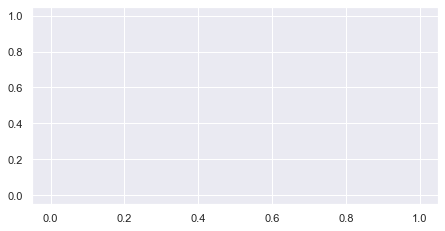

In [22]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

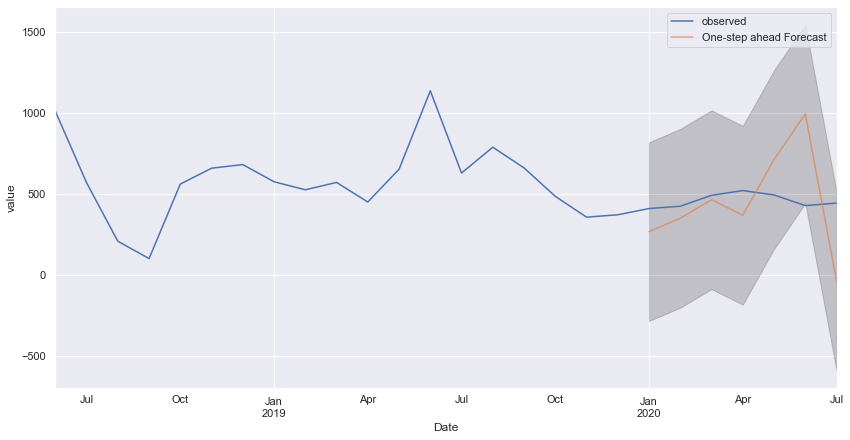

In [23]:
#предсказания с начала 2020 и сравнение с рельными данными
pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = sample_month['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('value')
plt.legend()
plt.show()

## Оценка ошибки

In [24]:
sample_month_forecasted = pred.predicted_mean
sample_month_truth = sample_month['2020-01-01':]
mse = ((sample_month_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

NameError: name 'y_truth' is not defined

In [25]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

NameError: name 'mse' is not defined

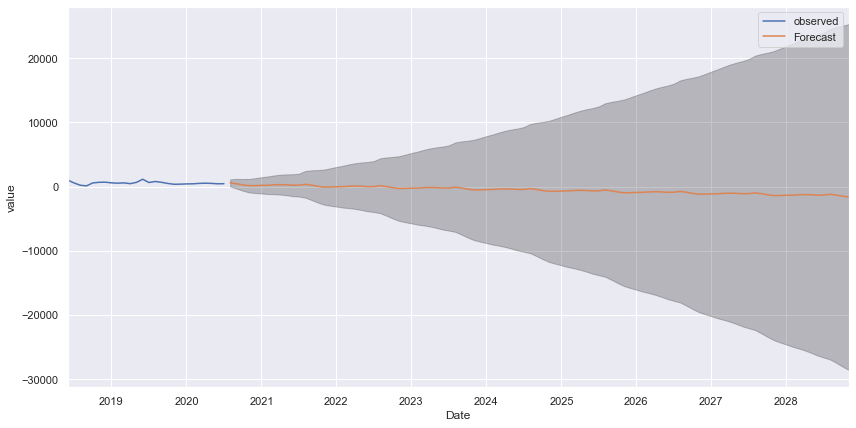

In [26]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = sample_month.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('value')
plt.legend()
plt.show()